# 3-1:The Graphs of odds,Logit and Sigmoid

Code.3-1-1:The Graphs of Odds and Logit

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2022-02-15 21:13:38.961274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-15 21:13:38.961380: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Text(0.5, 0, 'Probability')

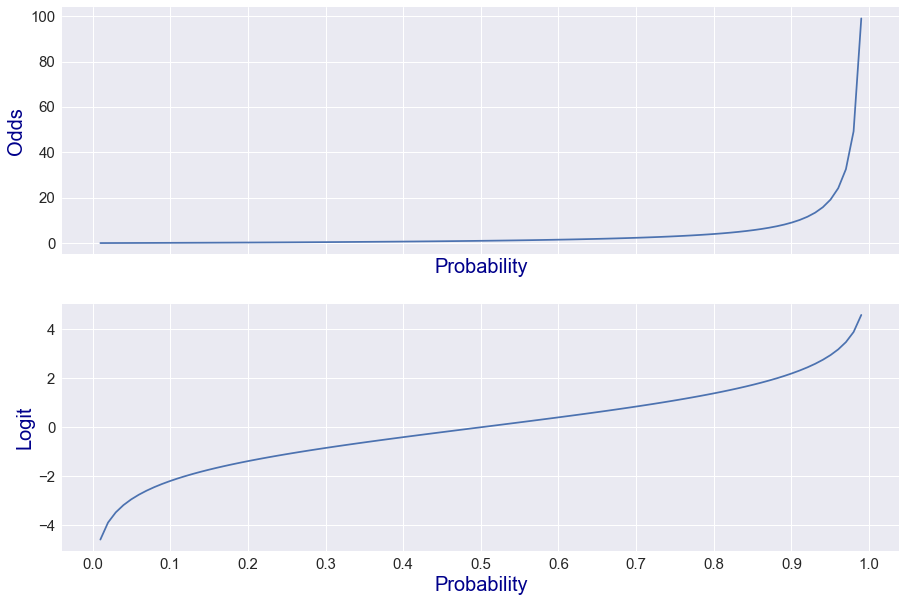

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01,0.99,100) # linspace함수는 1차원의 배열을 만들어준다.
p_tf = tf.linspace(0.01,0.99,100)

odds_np = p_np/(1-p_np)
odds_tf = p_tf/(1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2,1,figsize = (15,10),
                        sharex = True)
#numpy에서 실행해봄.
axes[0].plot(p_np,odds_np) #tensorflow에서 실행하기 위해서는 odds_tf.numpy()를 붙여서 실행해주면 된다.
axes[1].plot(p_np,logit_np)

xticks = np.arange(0,1.1,0.1) #x축을 0부터 1.1까지 0.2간격으로 구성하기 위한 리스트를 만들고

axes[0].tick_params(labelsize=15) #축에 있는 글자크기를 설정한다.
axes[0].set_xticks(xticks) #위에서 만든 xticks를 활용하여 x축을 세팅한다.
axes[0].set_ylabel('Odds', fontsize = 20, color = 'darkblue') #y축의 label 추가해준다.
axes[0].set_xlabel("Probability", fontsize = 20, color = "darkblue")

axes[1].tick_params(labelsize=15) #축에 있는 글자크기를 설정한다.
axes[1].set_xticks(xticks) #위에서 만든 xticks를 활용하여 x축을 세팅한다.
axes[1].set_ylabel('Logit', fontsize = 20, color = 'darkblue') #y축의 label 추가해준다.
axes[1].set_xlabel("Probability", fontsize = 20, color = "darkblue")

Code.3-1-2:The Graphs of Sigmoid

(100,)


Text(0.5, 0, 'Logit')

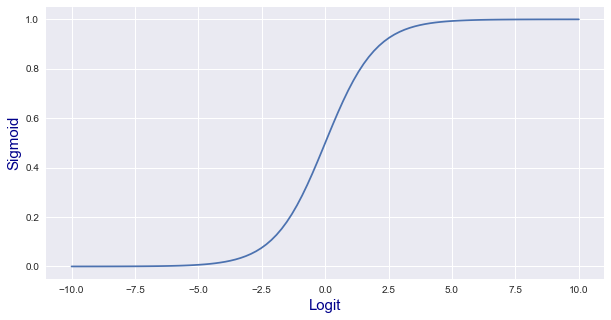

In [21]:
import tensorflow as tf

from tensorflow.keras.layers import Activation

X = tf.linspace(-10,10,100)
print(X.shape)
sigmoid = Activation("sigmoid")(X)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(X.numpy(),sigmoid.numpy())
ax.set_ylabel('Sigmoid', fontsize = 15, color = 'darkblue') #y축의 label 추가해준다.
ax.set_xlabel("Logit", fontsize = 15, color = "darkblue")

#아래 그래프를 보면, x 범위가 커져도 0 또는 1이 아닌 sigmoid의 x범위는 매우 좁음을 알 수있다. 
#그래서 모델이 좋으면 좋을 수록, sigmoid값은 0또는 1의 값이 나온다. 아니면, 0또는1에 거의 가까운값이 나온다.

# 3-2: Logistic Regression Models

Code.3-2-1: Single-variate Logistic Regression Models

(100, 1)


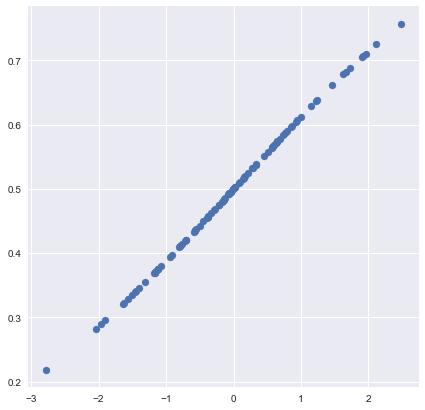

In [39]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100,1))
dense = Dense(units=1,activation = "sigmoid") #sigmoid는 출력이 각 입력의 확률로 출력이 되는 activation 이다. units=1인 이유는 single-variate logistic regression model이기 때문.
Y = dense(X)
print(Y.shape)
 
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(X,Y)



Code.3-2-2: Multi-variate Logistic Regression Models

In [17]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

X = tf.random.normal(shape=(100,5))
dense = Dense(units=1,activation = "sigmoid") #sigmoid는 출력이 각 입력의 확률로 출력이 되는 activation 이다. units=1인 이유는 single-variate logistic regression model이기 때문.

Y = dense(X)
print(Y.shape)

(100, 1)


# 3-3: Binary Classifier with Dense Layers

Code.3-3-1: Binary Classifier with Dense Layers

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X = tf.random.normal(shape=(100,5))

model = Sequential()
model.add(Dense(units = 10, activation ="relu"))
model.add(Dense(units =5, activation ="relu"))
model.add(Dense(units =1, activation ="sigmoid")) #마지막에는 sigmoid activation function으로 넣어줌으로써, 하나의 확률이 나올수있도록한다.

Y_sequential= model(X)
print(Y_sequential.shape)# shape를 확인해보면, 4X20임을 알 수있다. 즉, input(4,10)에서 neuron(10,10)과 (10,20)을 순차적으로 연산되어 나온 형태임을 알수있다.
print(Y_sequential.numpy())

(100, 1)
[[0.6926881 ]
 [0.52512604]
 [0.55403125]
 [0.6731178 ]
 [0.8072108 ]
 [0.81582606]
 [0.47587207]
 [0.74073046]
 [0.5670939 ]
 [0.5373398 ]
 [0.6881503 ]
 [0.437144  ]
 [0.5717812 ]
 [0.7511481 ]
 [0.6536331 ]
 [0.48175684]
 [0.8139044 ]
 [0.8592876 ]
 [0.69601345]
 [0.5655882 ]
 [0.52200764]
 [0.41818687]
 [0.9062401 ]
 [0.5600917 ]
 [0.767059  ]
 [0.56713945]
 [0.54553366]
 [0.6425174 ]
 [0.625085  ]
 [0.59217453]
 [0.4343682 ]
 [0.4308808 ]
 [0.69593364]
 [0.6106246 ]
 [0.49945104]
 [0.66874015]
 [0.790877  ]
 [0.64365447]
 [0.5332275 ]
 [0.74416935]
 [0.58944255]
 [0.5610054 ]
 [0.8216381 ]
 [0.5074386 ]
 [0.46398774]
 [0.43375736]
 [0.6646271 ]
 [0.80273986]
 [0.89176875]
 [0.6050625 ]
 [0.5332536 ]
 [0.76470405]
 [0.34378868]
 [0.71528655]
 [0.7584919 ]
 [0.47912776]
 [0.69484097]
 [0.41605875]
 [0.79060125]
 [0.5042321 ]
 [0.6159992 ]
 [0.36961973]
 [0.6989756 ]
 [0.5443762 ]
 [0.3813057 ]
 [0.6534104 ]
 [0.6847834 ]
 [0.40711775]
 [0.6722598 ]
 [0.77016854]
 [0.5850047